# **Apple v/s Tesla Analysis**

In [1]:
pip install yfinance

**Import Libraries and Set Time Range**

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
start_date = '2019-01-01'
end_date = '2024-12-31'

**Download Historical Stock Data**

In [4]:
apple = yf.download('AAPL', start=start_date, end=end_date)
tesla = yf.download('TSLA', start=start_date, end=end_date)

/tmp/ipython-input-4-3830762798.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  apple = yf.download('AAPL', start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-4-3830762798.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tesla = yf.download('TSLA', start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


**Clean and Prepare Data**

In [10]:
apple.columns = [col[0] if isinstance(col, tuple) else col for col in apple.columns]
tesla.columns = [col[0] if isinstance(col, tuple) else col for col in tesla.columns]

**Preview and Explore the Data**

In [11]:
print("Apple Data:")
print(apple.head())
print("\nTesla Data:")
print(tesla.head())

Apple Data:
                Close       High        Low       Open     Volume  \
Date                                                                
2019-01-02  37.617855  37.839391  36.738866  36.896084  148158800   
2019-01-03  33.870842  34.711717  33.825582  34.297233  365248800   
2019-01-04  35.316765  35.385847  34.254358  34.428249  234428400   
2019-01-07  35.238144  35.452534  34.754581  35.421565  219111200   
2019-01-08  35.909901  36.164785  35.378697  35.626432  164101200   

            Daily Return  
Date                      
2019-01-02           NaN  
2019-01-03           NaN  
2019-01-04           NaN  
2019-01-07           NaN  
2019-01-08           NaN  

Tesla Data:
                Close       High        Low       Open     Volume  \
Date                                                                
2019-01-02  20.674667  21.008667  19.920000  20.406668  174879000   
2019-01-03  20.024000  20.626667  19.825333  20.466667  104478000   
2019-01-04  21.179333  21.

**Preview and Explore the Data**

In [12]:
apple['Daily Return'] = apple['Close'].pct_change()
tesla['Daily Return'] = tesla['Close'].pct_change()

print(apple[['Close', 'Daily Return']].head())

                Close  Daily Return
Date                               
2019-01-02  37.617855           NaN
2019-01-03  33.870842     -0.099607
2019-01-04  35.316765      0.042689
2019-01-07  35.238144     -0.002226
2019-01-08  35.909901      0.019063


**Plot Daily Returns**

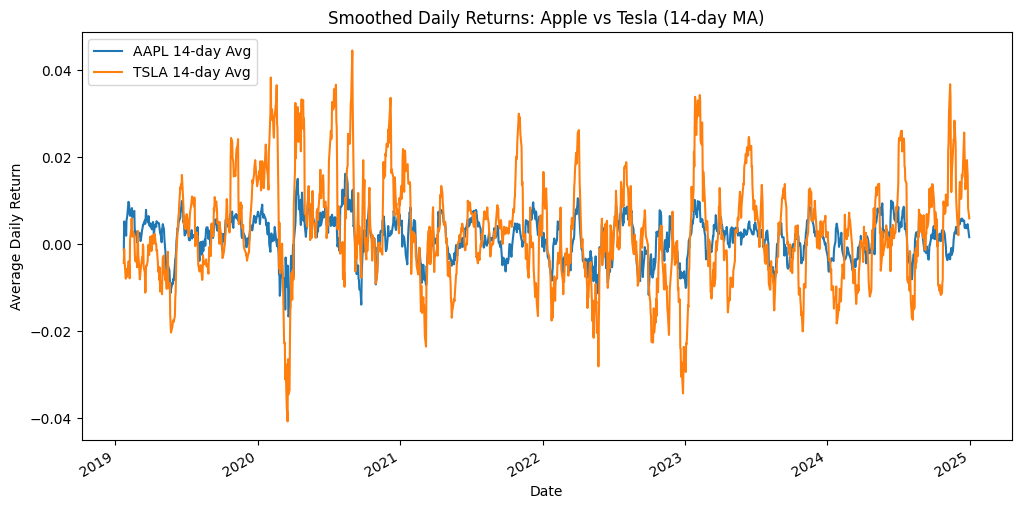

In [14]:
plt.figure(figsize=(12,6))
apple['Daily Return'].rolling(14).mean().plot(label='AAPL 14-day Avg')
tesla['Daily Return'].rolling(14).mean().plot(label='TSLA 14-day Avg')
plt.title('Smoothed Daily Returns: Apple vs Tesla (14-day MA)')
plt.xlabel('Date')
plt.ylabel('Average Daily Return')
plt.legend()
plt.show()

or a histogram

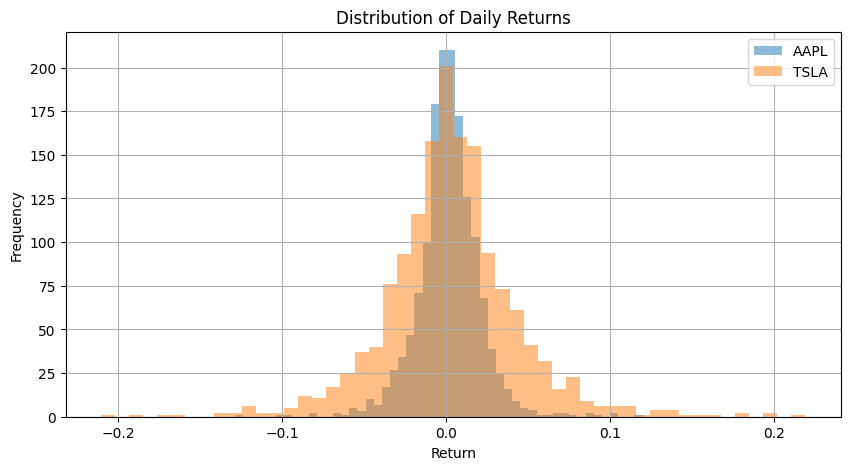

In [15]:
plt.figure(figsize=(10,5))
apple['Daily Return'].hist(bins=50, alpha=0.5, label='AAPL')
tesla['Daily Return'].hist(bins=50, alpha=0.5, label='TSLA')
plt.title('Distribution of Daily Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend()
plt.show()

**Cumulative Returns**

In [16]:
apple['Cumulative Return'] = (1 + apple['Daily Return']).cumprod()
tesla['Cumulative Return'] = (1 + tesla['Daily Return']).cumprod()

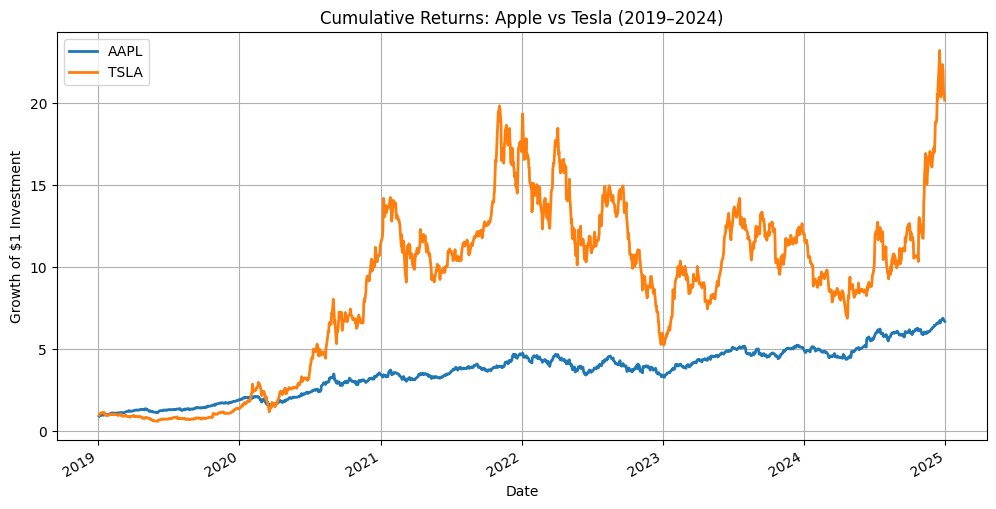

In [17]:
plt.figure(figsize=(12,6))
apple['Cumulative Return'].plot(label='AAPL', linewidth=2)
tesla['Cumulative Return'].plot(label='TSLA', linewidth=2)
plt.title('Cumulative Returns: Apple vs Tesla (2019–2024)')
plt.xlabel('Date')
plt.ylabel('Growth of $1 Investment')
plt.legend()
plt.grid(True)
plt.show()

**Rolling Volatility Comparison**

In [18]:
apple['Volatility'] = apple['Daily Return'].rolling(window=30).std()
tesla['Volatility'] = tesla['Daily Return'].rolling(window=30).std()

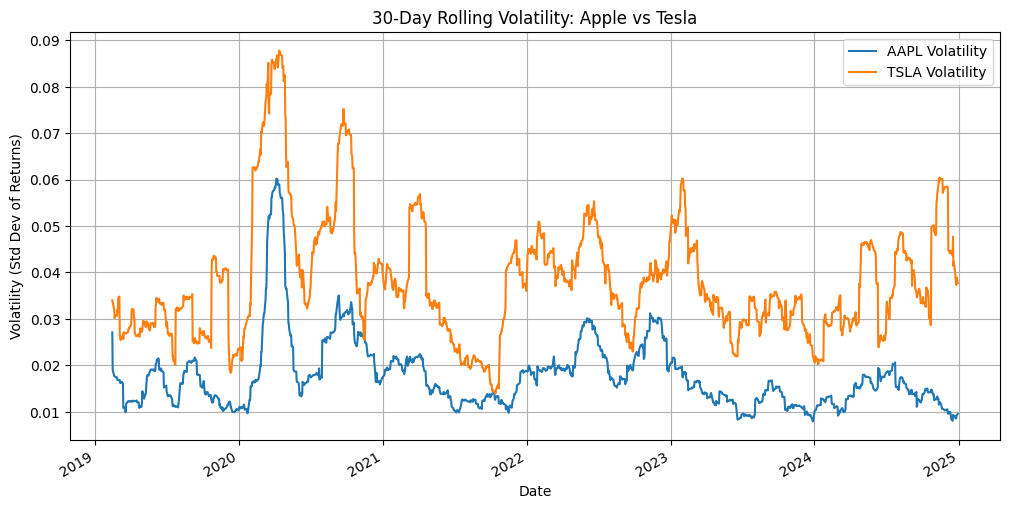

In [19]:
plt.figure(figsize=(12,6))
apple['Volatility'].plot(label='AAPL Volatility', linewidth=1.5)
tesla['Volatility'].plot(label='TSLA Volatility', linewidth=1.5)
plt.title('30-Day Rolling Volatility: Apple vs Tesla')
plt.xlabel('Date')
plt.ylabel('Volatility (Std Dev of Returns)')
plt.legend()
plt.grid(True)
plt.show()

**Summary Statistics**

In [20]:
print("🔹 Apple Daily Return Stats:\n")
print(apple['Daily Return'].describe())

print("\n🔹 Tesla Daily Return Stats:\n")
print(tesla['Daily Return'].describe())

🔹 Apple Daily Return Stats:

count    1508.000000
mean        0.001450
std         0.019432
min        -0.128647
25%        -0.007911
50%         0.001492
75%         0.011948
max         0.119808
Name: Daily Return, dtype: float64

🔹 Tesla Daily Return Stats:

count    1508.000000
mean        0.002817
std         0.040622
min        -0.210628
25%        -0.017966
50%         0.001987
75%         0.022226
max         0.219190
Name: Daily Return, dtype: float64


In [21]:
print("Avg Daily Return (AAPL):", apple['Daily Return'].mean())
print("Avg Daily Return (TSLA):", tesla['Daily Return'].mean())

Avg Daily Return (AAPL): 0.0014496842081572082
Avg Daily Return (TSLA): 0.002816564134747652
